In [1]:
import numpy as np

In [2]:
x = np.array([2,8,3,7,1,2,0,4,5])
x

array([2, 8, 3, 7, 1, 2, 0, 4, 5])

In [3]:
w=np.array([3,5,1,2])
w

array([3, 5, 1, 2])

In [4]:
print('all x : ',x)
for i in range(6):
    print(f'x[{i}:{i+4}]={x[i:i+4]}')

all x :  [2 8 3 7 1 2 0 4 5]
x[0:4]=[2 8 3 7]
x[1:5]=[8 3 7 1]
x[2:6]=[3 7 1 2]
x[3:7]=[7 1 2 0]
x[4:8]=[1 2 0 4]
x[5:9]=[2 0 4 5]


In [5]:
np.dot(x[0:4],w)

63

In [6]:
for i in range(6):
    print(np.dot(x[i:i+4],w))

63
48
49
28
21
20


In [7]:
from scipy.signal import correlate

In [8]:
correlate(x,w,mode='valid')

array([63, 48, 49, 28, 21, 20])

In [9]:
correlate(x,w,mode='same')

array([18, 24, 63, 48, 49, 28, 21, 20, 25])

In [10]:
from scipy.signal import correlate2d

In [11]:
x1=np.array([[1,2,3],[4,5,6],[7,8,9]])
x1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [12]:
w=np.array([[2,0],[0,0]])
w

array([[2, 0],
       [0, 0]])

In [13]:
correlate2d(x1,w,mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [14]:
correlate2d(x1,w,mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [15]:
image = np.array([[
    [1],
    [2],
    [3]
],[
    [4],
    [5],
    [6]
],[
    [7],
    [8],
    [9]
],[
    [1],
    [2],
    [3]
]])
image

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]],

       [[1],
        [2],
        [3]]])

In [16]:
image.shape #(줄,칸,RGB)

(4, 3, 1)

In [17]:
import tensorflow as tf

C:\ai\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ai\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ai\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ai\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [18]:
tf.enable_eager_execution()

In [19]:
x2 = np.array([[1,2,3],[4,5,6],[7,8,9]],dtype='float32')
x2

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

In [20]:
x2 = x2.reshape(1,3,3,1)
x2

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)

In [21]:
w

array([[2, 0],
       [0, 0]])

In [22]:
w=w.reshape(2,2,1,1)
w

array([[[[2]],

        [[0]]],


       [[[0]],

        [[0]]]])

In [23]:
conv = tf.nn.conv2d(x2,w,strides=1,padding='SAME')
conv

<tf.Tensor: id=2, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 2.],
         [ 4.],
         [ 6.]],

        [[ 8.],
         [10.],
         [12.]],

        [[14.],
         [16.],
         [18.]]]], dtype=float32)>

In [24]:
tf.nn.max_pool2d(conv,ksize=2,strides=1,padding='VALID')

<tf.Tensor: id=4, shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[10.],
         [12.]],

        [[16.],
         [18.]]]], dtype=float32)>

In [25]:
a = np.array([-1,2,-3,4,-5])

In [26]:
tf.nn.relu(a)

<tf.Tensor: id=7, shape=(5,), dtype=int32, numpy=array([0, 2, 0, 4, 0])>

텐서플로를 이용한 CNN

In [27]:
import matplotlib.pyplot as plt

In [28]:
image = np.array([[[
    [1],[2],[3]
],[
    [4],[5],[6]
],[
    [7],[8],[9]
]]],dtype='float32')
image

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)

In [29]:
image.shape

(1, 3, 3, 1)

In [30]:
image.reshape(3,3)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

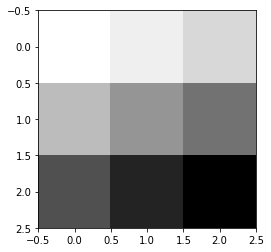

In [31]:
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

In [32]:
weight = np.array([[[[1]],[[1]]],
                   [[[1]],[[1]]]], dtype='float32')
weight

array([[[[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]]]], dtype=float32)

In [33]:
weight.shape

(2, 2, 1, 1)

In [34]:
conv2d = tf.nn.conv2d(image,weight,strides=1,padding='SAME')
conv2d

<tf.Tensor: id=11, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)>

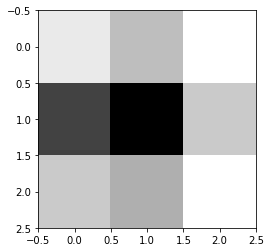

In [35]:
plt.imshow(conv2d.numpy().reshape(3,3), cmap='Greys')
plt.show()

In [36]:
image = np.array([[[[4],[3]],
                  [[2],[1]]]],dtype='float32')
image

array([[[[4.],
         [3.]],

        [[2.],
         [1.]]]], dtype=float32)

In [37]:
pool = tf.nn.max_pool(conv2d,ksize=2,strides=1,padding='SAME')
pool

<tf.Tensor: id=14, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[28.],
         [28.],
         [15.]],

        [[28.],
         [28.],
         [15.]],

        [[17.],
         [17.],
         [ 9.]]]], dtype=float32)>

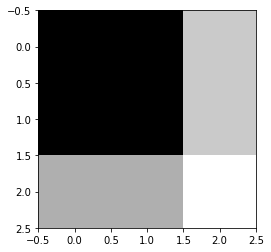

In [38]:
plt.imshow(pool.numpy().reshape(3,3),cmap='Greys')

# MNIST CNN(tensorflow)

In [39]:
from tensorflow.examples.tutorials.mnist import input_data

In [40]:
mnist = input_data.read_data_sets('./mnist/data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [41]:
X,y = mnist.train.next_batch(1)

In [42]:
X

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [43]:
print(X.shape)
print(y.shape)

(1, 784)
(1, 10)


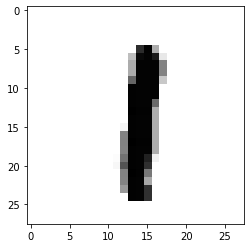

In [44]:
plt.imshow(X.reshape(28,28),cmap='Greys')

In [45]:
X=X.reshape(1,28,28,1)
X.shape

(1, 28, 28, 1)

In [46]:
initializer = tf.contrib.layers.xavier_initializer()

In [47]:
w1 = tf.Variable(initializer([3,3,1,32]))
w1

<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-3.37836146e-03, -9.43738073e-02, -3.20686400e-03,
           3.46322358e-03, -6.13821745e-02,  1.25674561e-01,
          -1.16376691e-01,  1.81675404e-02, -1.21580198e-01,
          -1.13220222e-01,  6.14437163e-02,  3.87795568e-02,
           1.31600276e-01, -3.10757756e-02,  4.76684421e-02,
          -8.23764503e-03,  1.12644777e-01, -5.55318296e-02,
          -8.82788673e-02, -9.52930376e-02, -7.25174919e-02,
          -9.97621715e-02,  9.79985744e-02,  1.11302629e-01,
          -7.51117021e-02, -3.12872231e-03,  1.34696260e-01,
          -5.71301281e-02, -4.43657488e-02,  2.58201957e-02,
           8.38836432e-02, -6.54818341e-02]],

        [[-6.72838986e-02,  1.10284388e-02, -5.78561276e-02,
          -1.74296871e-02,  9.70285833e-02, -6.56052530e-02,
           1.09112665e-01,  4.22718823e-02,  1.40062585e-01,
           1.41717479e-01, -1.18229583e-01, -3.20320800e-02,
           8.39264691e-03,  8.7

In [48]:
convolution_h1 = tf.nn.conv2d(X,w1,strides=1,padding='SAME')
convolution_h1

<tf.Tensor: id=35, shape=(1, 28, 28, 32), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [49]:
convolution_h1 = tf.nn.relu(convolution_h1)
convolution_h1

<tf.Tensor: id=37, shape=(1, 28, 28, 32), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [50]:
convolution_h1.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(32)])

In [51]:
w2 = tf.Variable(initializer([3,3,32,64]))
w2

<tf.Variable 'Variable:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
array([[[[ 1.8803850e-03, -4.6069525e-02, -7.6137289e-02, ...,
          -2.7886629e-02, -6.2385779e-02, -1.1891104e-02],
         [ 6.6893853e-02,  5.3426661e-02,  6.3912965e-02, ...,
           1.8301368e-02,  7.3663481e-02, -6.1632276e-02],
         [-3.9222740e-02,  3.6159374e-02, -3.6514025e-02, ...,
           8.2422860e-02,  4.2341478e-02, -5.2750349e-02],
         ...,
         [ 5.3911529e-02, -5.3929888e-02,  5.7289921e-02, ...,
           1.2773059e-02, -6.4502940e-02,  3.3347927e-02],
         [ 2.6339412e-02,  2.6687562e-02, -9.8793879e-03, ...,
          -7.0446000e-02,  3.0283451e-02, -7.3974192e-02],
         [ 5.2425273e-02, -4.0817004e-02, -3.3710301e-02, ...,
          -4.8286736e-02,  8.2853176e-02, -6.5262996e-02]],

        [[ 6.0671724e-02,  6.5707944e-02,  3.7031747e-02, ...,
           3.1430840e-02, -1.6153909e-02, -5.4566782e-02],
         [ 1.5364610e-02,  7.0430048e-02,  3.8631976e-02, ...

In [52]:
convolution_h2 = tf.nn.conv2d(convolution_h1,w2,strides=1,padding='SAME')
convolution_h2

<tf.Tensor: id=55, shape=(1, 28, 28, 64), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [53]:
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2

<tf.Tensor: id=57, shape=(1, 28, 28, 64), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0.

In [54]:
convolution_h2 = tf.nn.max_pool(convolution_h2,ksize=2,strides=2,padding='SAME')
convolution_h2.shape

TensorShape([Dimension(1), Dimension(14), Dimension(14), Dimension(64)])

In [55]:
w3 = tf.Variable(initializer([14*14*64,256]))
w3

<tf.Variable 'Variable:0' shape=(12544, 256) dtype=float32, numpy=
array([[ 0.00502487, -0.01418214, -0.01320135, ...,  0.00169548,
         0.01032739,  0.01935281],
       [-0.02138563,  0.00805302,  0.00769013, ..., -0.01990439,
        -0.00573114,  0.00391456],
       [-0.00101814,  0.01772601, -0.01295558, ...,  0.0211953 ,
         0.01651139,  0.00289802],
       ...,
       [ 0.00504455,  0.01189749, -0.0117857 , ..., -0.00591983,
        -0.02161468,  0.01570007],
       [-0.01449132,  0.00537036, -0.0156926 , ..., -0.00301456,
         0.02110791, -0.00987362],
       [-0.00151451, -0.01206928, -0.00376342, ..., -0.01072794,
         0.01976305, -0.01135781]], dtype=float32)>

In [56]:
w3.shape

TensorShape([Dimension(12544), Dimension(256)])

In [57]:
convolution_h2.shape

TensorShape([Dimension(1), Dimension(14), Dimension(14), Dimension(64)])

In [58]:
convolution_h2 = tf.reshape(convolution_h2,[-1,14*14*64])
convolution_h2

<tf.Tensor: id=76, shape=(1, 12544), dtype=float32, numpy=array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [59]:
convolution_h2.shape

TensorShape([Dimension(1), Dimension(12544)])

In [60]:
y_h1 = tf.matmul(convolution_h2,w3)
y_h1

<tf.Tensor: id=79, shape=(1, 256), dtype=float32, numpy=
array([[-3.82422656e-02,  4.41725999e-02,  7.81640708e-02,
         2.62920056e-02,  1.84417609e-02,  1.78365596e-02,
        -4.79122363e-02,  9.95763298e-03, -1.05627980e-02,
        -2.02574655e-02,  1.34413624e-02,  7.71590173e-02,
        -4.54975143e-02, -1.15116328e-01, -1.52819837e-02,
        -8.51428136e-02, -5.19202370e-03,  3.30371670e-02,
        -1.15836253e-02,  3.51592451e-02, -4.56743315e-02,
        -8.80607776e-03, -5.96169345e-02,  1.83428675e-02,
        -5.23859784e-02,  9.26777720e-04,  3.33233736e-02,
         2.18891688e-02, -4.97154780e-02,  2.07809731e-03,
        -1.46421716e-02,  5.89891560e-02, -1.97954979e-02,
         7.95017332e-02, -8.31673387e-03, -2.70278715e-02,
         1.56221241e-02, -1.64457168e-02,  3.99538316e-02,
        -2.48379335e-02,  2.07385924e-02, -3.09952088e-02,
        -4.08421680e-02, -6.82804640e-03,  2.22466737e-02,
        -5.57181798e-02,  4.02744412e-02,  5.61795309e-02,

In [61]:
y_h1 = tf.nn.relu(y_h1)
y_h1

<tf.Tensor: id=81, shape=(1, 256), dtype=float32, numpy=
array([[0.00000000e+00, 4.41725999e-02, 7.81640708e-02, 2.62920056e-02,
        1.84417609e-02, 1.78365596e-02, 0.00000000e+00, 9.95763298e-03,
        0.00000000e+00, 0.00000000e+00, 1.34413624e-02, 7.71590173e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.30371670e-02, 0.00000000e+00, 3.51592451e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.83428675e-02,
        0.00000000e+00, 9.26777720e-04, 3.33233736e-02, 2.18891688e-02,
        0.00000000e+00, 2.07809731e-03, 0.00000000e+00, 5.89891560e-02,
        0.00000000e+00, 7.95017332e-02, 0.00000000e+00, 0.00000000e+00,
        1.56221241e-02, 0.00000000e+00, 3.99538316e-02, 0.00000000e+00,
        2.07385924e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.22466737e-02, 0.00000000e+00, 4.02744412e-02, 5.61795309e-02,
        0.00000000e+00, 5.37595898e-02, 0.00000000e+00, 1.04476660e-02,
       

In [62]:
w4 = tf.Variable(initializer([256,10]))
w4

<tf.Variable 'Variable:0' shape=(256, 10) dtype=float32, numpy=
array([[ 0.10688561, -0.12484665, -0.14937416, ...,  0.02990821,
         0.03102289, -0.03394186],
       [ 0.05486426,  0.00583202,  0.13352594, ...,  0.03572221,
        -0.0331654 ,  0.12278393],
       [-0.13703473, -0.03764346,  0.04089038, ...,  0.05816334,
         0.09536394, -0.12246946],
       ...,
       [-0.1230176 ,  0.05426161,  0.05266574, ..., -0.09695867,
        -0.11611   ,  0.03865503],
       [-0.14408688, -0.0046007 , -0.11651072, ...,  0.08068484,
         0.03584689,  0.06784067],
       [-0.08721501,  0.0052432 ,  0.0660143 , ...,  0.05144262,
         0.02057621,  0.12824586]], dtype=float32)>

In [63]:
y_h2 = tf.nn.softmax(tf.matmul(y_h1,w4))
y_h2

<tf.Tensor: id=100, shape=(1, 10), dtype=float32, numpy=
array([[0.10016679, 0.09442231, 0.09817331, 0.09749127, 0.10222413,
        0.0994604 , 0.10009286, 0.10220702, 0.10526674, 0.10049529]],
      dtype=float32)>

In [64]:
mnist.train.num_examples

55000

In [65]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

In [66]:
optimizer = tf.train.AdamOptimizer(0.001)

In [67]:
for i in range(11):
    total_cost = 0
    for j in range(total_batch):
        X,y = mnist.train.next_batch(batch_size)
        X=X.reshape(-1,28,28,1)
        with tf.GradientTape() as tape:
            convolution_h1=tf.nn.conv2d(X,w1,strides=1,padding='SAME')
            convolution_h1=tf.nn.relu(convolution_h1)
            convolution_h2=tf.nn.conv2d(convolution_h1,w2,strides=1,padding='SAME')
            convolution_h2=tf.nn.relu(convolution_h2)
            convolution_h2=tf.nn.max_pool(convolution_h2,ksize=2,strides=2,padding='SAME')
            convolution_h2=tf.reshape(convolution_h2,[-1,14*14*64])
            y_h1=tf.matmul(convolution_h2,w3)
            y_h1=tf.nn.relu(y_h1)
            y_h2=tf.nn.softmax(tf.matmul(y_h1,w4))
            cost=-tf.reduce_sum(y*tf.log(y_h2))/len(y_h2)
            grads = tape.gradient(cost,[w1,w2,w3,w4])
            optimizer.apply_gradients(grads_and_vars=zip(grads,[w1,w2,w3,w4]))
        total_cost+=cost
    print(f'step : {i} , cost : {total_cost/total_batch}')

step : 0 , cost : 0.13817057013511658
step : 1 , cost : 0.03918509557843208
step : 2 , cost : 0.02337421104311943
step : 3 , cost : 0.015491887927055359
step : 4 , cost : 0.009258884005248547
step : 5 , cost : 0.00740951718762517
step : 6 , cost : 0.008306636475026608
step : 7 , cost : 0.007139748428016901
step : 8 , cost : nan
step : 9 , cost : nan
step : 10 , cost : nan
